In [1]:
!pip install -Uqq fastbook

In [2]:
from fastbook import *

In [3]:
searches = 'cat', 'dog'
path = Path('dog_or_cat')
import time

for search in searches:
    dest = (path/search)
    dest.mkdir(parents = True, exist_ok = True)
    download_images(dest, urls = search_images_ddg(f'{search} photos', max_images = 10))
    resize_images(dest, max_size = 400, dest = dest)

In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(len(failed))

0


In [10]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs = 5)

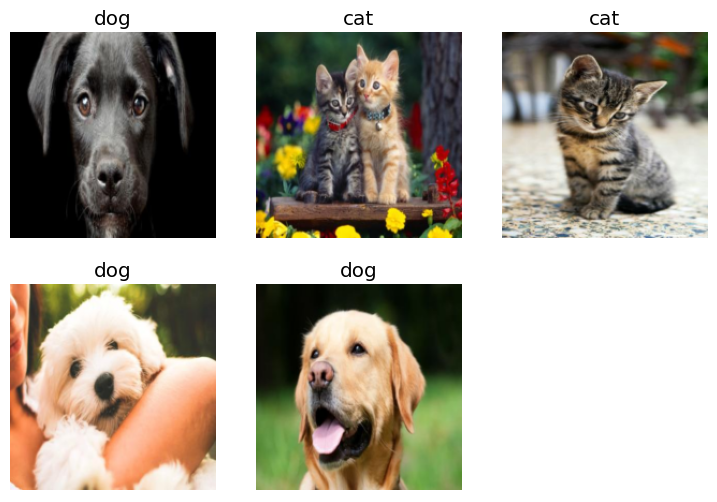

In [13]:
dls.show_batch()

In [16]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\LENOVO/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:16<00:00, 5.33MB/s]


In [19]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.026213,0.125158,0.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.118633,0.151178,0.000000,00:05
1,0.057723,0.250507,0.250000,00:05
2,0.116198,0.318458,0.250000,00:05
3,0.086735,0.499768,0.250000,00:05
4,0.089411,0.745009,0.250000,00:05
5,0.082447,0.660284,0.250000,00:05
6,0.126420,0.704042,0.250000,00:04
7,0.107271,0.726004,0.250000,00:05
8,0.092956,0.579587,0.250000,00:04
9,0.080949,0.643193,0.250000,00:05


In [34]:
url = search_images_ddg('Dog image', max_images = 1)
download_url(url[0], 'dog.jpg', show_progress = True)

Path('dog.jpg')

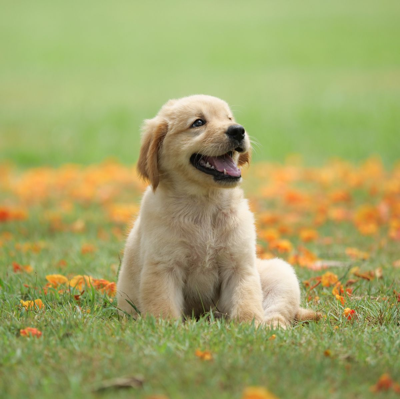

In [36]:
Image.open('dog.jpg').to_thumb(400, 400)

In [41]:
res, _, prob = learn.predict(PILImage.create('dog.jpg'))
print(res, prob[0])

dog tensor(0.0024)


In [46]:
res, _, prob = learn.predict(PILImage.create('cat.jpg'))
print(res, prob[0])

cat tensor(0.9999)


In [43]:
res, _, prob = learn.predict(PILImage.create('crocodile.jpeg'))
print(res, prob[0])

cat tensor(0.9135)


In [44]:
res, _, prob = learn.predict(PILImage.create('bird.jpg'))
print(res, prob[0])

cat tensor(0.9907)
